1. Training set images: train-images-idx3-ubyte.gz (9.9 MB, 解压后 47 MB, 包含 60,000 个样本)
2. Training set labels: train-labels-idx1-ubyte.gz (29 KB, 解压后 60 KB, 包含 60,000 个标签)
3. Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 解压后 7.8 MB, 包含 10,000 个样本)
4. Test set labels: t10k-labels-idx1-ubyte.gz (5KB, 解压后 10 KB, 包含 10,000 个标签)
5. 图像为28×28

In [1]:
#导入库
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


1. 手动导入本地已经下载好的npz文件。npz文件是NumPy Zipped Data。本质就是多个数组。可以参考numpy.savez函数.用savez保存的时候可以用关键字给数组命名。
2. 数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中。本质就是1个数组。可以参考numpy.save函数.


In [2]:
path='/home/dashen/Downloads/mnist/mnist/mnist.npz'
f = np.load(path)
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']
f.close()

显示一下读入的数据是什么样子的。
1. x_train：是一个60000*28*28的矩阵。也就是60000个28*28的灰度图像。其中每个灰度值是0~255之间
2. y_train：是60000个标签，标签值是0-9
3. x_test：是一个10000*28*28的矩阵。也就是10000个28*28的灰度图像。其中每个灰度值是0~255之间
4. y_test：是10000个标签，标签值是0-9
5. 接下来我们试试看。

In [3]:
#首先看一下x_train的数据。
print('x_train.shape',x_train.shape)
print('x_train.size',x_train.size)
print('x_train[0]',x_train[0])
print('x_train[0].shape',x_train[0].shape)

x_train.shape (60000, 28, 28)
x_train.size 47040000
x_train[0] [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 

In [4]:
#更加直观的输出，其实就是一个5
import pandas as pd
from pandas import DataFrame
index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
fram1=DataFrame(x_train[0],index=index)
fram1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
7,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
8,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
9,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#然后看一下y_train的数据。
print('y_train.shape',y_train.shape)
print('y_train.size',y_train.size)
print('y_train[0]',y_train[0])
print('y_train[0].shape',y_train[0].shape)

y_train.shape (60000,)
y_train.size 60000
y_train[0] 5
y_train[0].shape ()


In [6]:
#第三看一下x_test的数据。
print('x_test.shape',x_test.shape)
print('x_test.size',x_test.size)
print('x_test[0]',x_test[0])
print('x_test[0].shape',x_test[0].shape)

x_test.shape (10000, 28, 28)
x_test.size 7840000
x_test[0] [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0

In [7]:
#第四看一下y_test的数据。
print('y_test.shape',y_test.shape)
print('y_test.size',y_test.size)
print('y_test[0]',y_test[0])
print('y_test[0].shape',y_test[0].shape)

y_test.shape (10000,)
y_test.size 10000
y_test[0] 7
y_test[0].shape ()


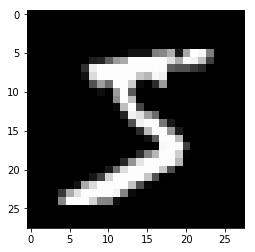

In [8]:
#第五看一下图片的样子。
plt.figure()
plt.imshow(x_train[0], cmap='gray', interpolation='none')

In [9]:
#图片压平到1个数组内。并且把数据类型转化为浮点型，为了接下来归一化做准备。
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
# 数据归一化
x_train /= 255
x_test /= 255

In [10]:
#再看一下x_train的数据。
print('x_train.shape',x_train.shape)
print('x_train.size',x_train.size)
print('x_train[0]',x_train[0])
print('x_train[0].shape',x_train[0].shape)

x_train.shape (60000, 784)
x_train.size 47040000
x_train[0] [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        

In [11]:
#定义训练的数据，batch大小，epoch大小，最终分类的数量（num_classes）
batch_size = 128
num_classes = 10
epochs = 3#20

In [12]:
#目前y_train的数据还是0~9的数据分类。需要做成独热编码。比如现在是60000*1的数据标签，变成独热编码就是60000*10
#显示一下独热编码之后的样子
print(y_train.shape)
for i in range(10):
    print(y_train[i])

y_train = keras.utils.to_categorical(y_train, num_classes)
print(y_train.shape)
for i in range(10):
    print(y_train[i])
    
y_test = keras.utils.to_categorical(y_test, num_classes)

# keras.utils.to_categorical(y, num_classes=None, dtype='float32')
# 将类向量（整数）转换为二进制类矩阵
# 将整型标签转为onehot。y为int数组，num_classes为标签类别总数，大于max(y)（标签从0开始的）。

(60000,)
5
0
4
1
9
2
1
3
1
4
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
#定义模型
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

W0901 11:15:38.697071 140656901809920 deprecation_wrapper.py:119] From /home/dashen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 11:15:38.732794 140656901809920 deprecation_wrapper.py:119] From /home/dashen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 11:15:38.739559 140656901809920 deprecation_wrapper.py:119] From /home/dashen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 11:15:38.773168 140656901809920 deprecation_wrapper.py:119] From /home/dashen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placehold

In [14]:
#显示模型的overview
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [15]:
#编译模型，损失函数使用交叉熵
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

W0901 11:15:38.919929 140656901809920 deprecation_wrapper.py:119] From /home/dashen/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0901 11:15:38.934464 140656901809920 deprecation_wrapper.py:119] From /home/dashen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [16]:
#训练模型
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

W0901 11:15:39.111230 140656901809920 deprecation.py:323] From /home/dashen/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 19s 314us/step - loss: 0.2549 - acc: 0.9207 - val_loss: 0.1283 - val_acc: 0.9588
Epoch 2/3
60000/60000 [==============================] - 19s 315us/step - loss: 0.1066 - acc: 0.9672 - val_loss: 0.0813 - val_acc: 0.9750
Epoch 3/3
60000/60000 [==============================] - 22s 363us/step - loss: 0.0780 - acc: 0.9758 - val_loss: 0.0791 - val_acc: 0.9765


In [17]:
#模型的评估
score = model.evaluate(x_test, y_test, verbose=0)
print('Total loss on Test Set:', score[0])
print('Accuracy of Testing Set:', score[1])

Total loss on Test Set: 0.07908383468847606
Accuracy of Testing Set: 0.9765


In [34]:
#进行预测
result = model.predict_classes(x_test)
print(result.shape)
correct_indices = np.nonzero(result == y_test)[0]
print(correct_indices.shape)
print(correct_indices)
incorrect_indices = np.nonzero(result != y_test)[0]
print(incorrect_indices.shape)
print(incorrect_indices)

(10000,)
(0,)
[]
(1,)
[0]


/home/dashen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.
/home/dashen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  import sys


In [22]:
#显示预测的结果
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(result[correct], y_test[correct]))


<Figure size 432x288 with 0 Axes>

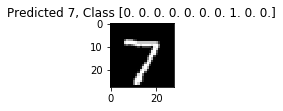

In [23]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(result[incorrect], y_test[incorrect]))
    plt.show()

Pytorch 实现

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from visdom import Visdom

batch_size = 128
num_classes = 10
epochs = 3#20
path='/home/dashen/Downloads/mnist/mnist/mnist.npz'
f = np.load(path)
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']
f.close()

x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
# 模型训练时提示 RuntimeError: multi-target not supported at
# 其标签必须为0~n-1，而且必须为1维的，如果设置标签为[nx1]的，则也会出现以上错误。

import torch
from torch import nn
import tensorboard
from torch.utils.tensorboard import SummaryWriter #pip install future


class Net(nn.Module):
    def __init__(self,n_feature,n_output):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(n_feature, 512)
        self.hidden2 = nn.Linear(512, 512)
        self.hidden3 = nn.Linear(512, 512)
        self.predict = nn.Linear(512, n_output)
    def forward(self, x):
#         x=self.hidden1(x)
#         x=torch.tanh(x)
#         x=self.hidden2(x)
#         x=torch.tanh(x)

#         x=self.hidden1(x)
#         x=torch.sigmoid(x)
#         x=self.hidden2(x)
#         x=torch.sigmoid(x)

#         x=self.hidden1(x)
#         x=torch.nn.functional.relu(x)
#         x=torch.nn.functional.dropout(x,p = 0.5)
#         x=self.hidden2(x)
#         x=torch.nn.functional.relu(x)
#         x=torch.nn.functional.dropout(x,p = 0.5)
#         x=self.hidden3(x)
#         x=torch.nn.functional.relu(x)
#         x=torch.nn.functional.dropout(x,p = 0.5)        
#         out = self.predict(x)
        
        x=self.hidden1(x)
        x=torch.tanh(x)
        x=torch.nn.functional.dropout(x,p = 0.5)
        x=self.hidden2(x)
        x=torch.tanh(x)
        x=torch.nn.functional.dropout(x,p = 0.5)
        x=self.hidden3(x)
        x=torch.tanh(x)
        x=torch.nn.functional.dropout(x,p = 0.5)        
        out = self.predict(x)
        return out

input_feature=784
output_feature=10
net=Net(input_feature,output_feature)
print(net)


optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = nn.CrossEntropyLoss()

x_torch_train=torch.from_numpy(x_train)
x_torch_test=torch.from_numpy(x_test)
y_torch_train=torch.from_numpy(y_train).long()
y_torch_test=torch.from_numpy(y_test).long()

num_epochs = 25

writer=SummaryWriter(comment="Mnist",log_dir='/home/dashen/Desktop/MachineLearning/mnist')
writer.add_graph(net,(x_torch_train,))

for epoch in range(num_epochs):
    predition=net(x_torch_train)
    loss=loss_func(predition,y_torch_train) #输入要是一个tensor
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('round ' + str(epoch) + ' ' +str(loss))
    writer.add_scalar("Train",loss,epoch)
writer.close()    
print(loss.data)

Net(
  (hidden1): Linear(in_features=784, out_features=512, bias=True)
  (hidden2): Linear(in_features=512, out_features=512, bias=True)
  (hidden3): Linear(in_features=512, out_features=512, bias=True)
  (predict): Linear(in_features=512, out_features=10, bias=True)
)


/home/dashen/anaconda3/lib/python3.7/site-packages/torch/jit/__init__.py:914: TracerWarning: Trace had nondeterministic nodes. Did you forget call .eval() on your model? Nodes:
	%input.3 : Float(60000, 512) = aten::dropout(%input.2, %19, %20), scope: Net # /home/dashen/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:806:0
	%input.5 : Float(60000, 512) = aten::dropout(%input.4, %27, %28), scope: Net # /home/dashen/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:806:0
	%input : Float(60000, 512) = aten::dropout(%input.6, %35, %36), scope: Net # /home/dashen/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:806:0
This may cause errors in trace checking. To disable trace checking, pass check_trace=False to torch.jit.trace()
  check_tolerance, _force_outplace, True, _module_class)
/home/dashen/anaconda3/lib/python3.7/site-packages/torch/jit/__init__.py:914: TracerWarning: Output nr 1. of the traced function does not match the corresponding output of the 

round 0 tensor(2.3073, grad_fn=<NllLossBackward>)
round 1 tensor(2.2583, grad_fn=<NllLossBackward>)
round 2 tensor(2.2073, grad_fn=<NllLossBackward>)
round 3 tensor(2.1485, grad_fn=<NllLossBackward>)
round 4 tensor(2.0729, grad_fn=<NllLossBackward>)
round 5 tensor(1.9728, grad_fn=<NllLossBackward>)
round 6 tensor(1.8388, grad_fn=<NllLossBackward>)
round 7 tensor(1.6692, grad_fn=<NllLossBackward>)
round 8 tensor(1.4859, grad_fn=<NllLossBackward>)
round 9 tensor(1.3165, grad_fn=<NllLossBackward>)
round 10 tensor(1.1762, grad_fn=<NllLossBackward>)
round 11 tensor(1.0617, grad_fn=<NllLossBackward>)
round 12 tensor(0.9706, grad_fn=<NllLossBackward>)
round 13 tensor(0.8978, grad_fn=<NllLossBackward>)
round 14 tensor(0.8414, grad_fn=<NllLossBackward>)
round 15 tensor(0.8111, grad_fn=<NllLossBackward>)
round 16 tensor(0.8545, grad_fn=<NllLossBackward>)
round 17 tensor(1.1677, grad_fn=<NllLossBackward>)
round 18 tensor(1.4716, grad_fn=<NllLossBackward>)
round 19 tensor(1.2847, grad_fn=<NllLossB

In [88]:
!tensorboard --logdir=/home/dashen/Desktop/MachineLearning/mnist

TensorBoard 1.14.0 at http://dashen-PC:6006/ (Press CTRL+C to quit)
^C


In [87]:
!python -m visdom.server

/home/dashen/anaconda3/lib/python3.7/site-packages/visdom/server.py:30: DeprecationWarning: zmq.eventloop.ioloop is deprecated in pyzmq 17. pyzmq now works with default tornado and asyncio eventloops.
  ioloop.install()  # Needs to happen before any tornado imports!
Checking for scripts.
It's Alive!
INFO:root:Application Started
You can navigate to http://localhost:8097
^C
Traceback (most recent call last):
  File "/home/dashen/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/dashen/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/dashen/anaconda3/lib/python3.7/site-packages/visdom/server.py", line 1308, in <module>
    download_scripts_and_run()
  File "/home/dashen/anaconda3/lib/python3.7/site-packages/visdom/server.py", line 1304, in download_scripts_and_run
    main()
  File "/home/dashen/anaconda3/lib/python3.7/site-packages/visdom/server.py", line 1299, in main
    print_f